# 🌟📄 Resume Job Recommendation and Classification Project 🚀💼

Welcome to the Resume Job Recommendation and Classification project! This notebook will guide you through the steps of building a robust system to categorize resumes and recommend suitable job positions using various machine learning techniques. Let's dive in! 🌊🐠

## 📚 Libraries Used 📦

In this project, we utilize several powerful libraries to handle data processing, modeling, and evaluation. Here are the libraries we use:

- **pandas** 🐼
- **numpy** 🔢
- **matplotlib** 📊
- **seaborn** 🎨
- **warnings** ⚠️
- **scikit-learn** 📚
- **XGBoost** 🚀
- **NLTK** 🗣️
- **joblib** 💾
- **re** 🔍

## 📝 Project Steps 🛤️

### 1. **Data Loading and Exploration** 🗂️🔍

- **pandas** 🐼: We use this library to load and explore our dataset. It provides easy-to-use data structures and data analysis tools.
- **numpy** 🔢: This library is used for numerical computations and handling arrays.

### 2. **Data Preprocessing** 🧹🛠️

- **NLTK** 🗣️: We use the Natural Language Toolkit for text processing. Specifically, we use:
  - **PorterStemmer** 🌱: To perform stemming, reducing words to their root forms.
  - **stopwords** 🚫: To remove common words that do not add significant meaning to the text.
- **re** 🔍: This library is used for regular expressions, allowing us to clean and preprocess text data.

### 3. **Feature Extraction** 🔠📈

- **scikit-learn** 📚: We use this library's **TfidfVectorizer** 📐 to transform text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).

### 4. **Handling Imbalanced Data** ⚖️🔄

- **scikit-learn** 📚: We use **resample** 🔄 to handle class imbalances in our dataset by oversampling the minority class.

### 5. **Model Building** 🏗️🤖

- **scikit-learn** 📚: This library provides various classifiers for our model building:
  - **RandomForestClassifier** 🌳: A versatile classifier that uses multiple decision trees.
  - **ExtraTreesClassifier** 🌲: An ensemble method that aggregates the results of multiple de-correlated decision trees.
- **XGBoost** 🚀: We use **XGBClassifier** 🌟 for gradient boosting to improve model performance.

### 6. **Model Evaluation** 📏🔍

- **scikit-learn** 📚: We use **train_test_split** 📊 to split our data into training and testing sets, and **accuracy_score** 📈 to evaluate our models.
- **classification_report** 📝: This tool provides detailed metrics like precision, recall, and F1-score to assess our model's performance.

### 7. **Saving the Model** 💾🔒

- **joblib** 💾: We use this library to save our trained model, allowing us to load and use it for future predictions without retraining.

## 🎨 Visualization 📊🎨

- **matplotlib** 📊: We use this library to visualize data distributions, model performance, and other insights.
- **seaborn** 🎨: This library is used for creating attractive and informative statistical graphics.

---

By following these steps, we aim to build an effective resume classification and job recommendation system that can help match candidates with the best job opportunities! 🏆📄💼


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
import warnings as w
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import classification_report
w.filterwarnings('ignore')
import joblib as j
import re as r

# 🔍 Data Loading and Exploration 🗂️📊

### 1. **Loading the Dataset** 🗃️📥

- We load our dataset using **pandas** 🐼, specifically reading from a CSV file named `clean_resume_data.csv`. This dataset contains information about resumes, categorized into different job sectors.

### 2. **Initial Exploration** 🧐🔎

- We use the **head()** method to take a peek at the first 5 entries in our dataset to understand its structure.
- The **shape** method reveals that our dataset consists of 2484 rows and 3 columns. 📏🔢

### 3. **Dataset Structure** 🧱🔍

- We use **info()** to get a summary of the dataset, which includes the data types of each column and the count of non-null values in each column.
- Our dataset has three columns: `ID`, `Category`, and `Feature`. While `ID` is an integer, `Category` and `Feature` are objects (strings). 🧩

### 4. **Handling Missing Values** 🧹🚫

- We notice that one entry in the `Feature` column is missing (`NaN`). To ensure clean data, we drop any rows containing null values using **dropna()**. 🗑️
- After cleaning, our dataset now contains 2483 rows. ✅

### 5. **Unique Categories** 🏷️🔍

- We check the unique values in the `Category` column to understand the different job sectors present in our dataset. 🗂️
- The dataset includes resumes categorized into various job sectors such as HR, DESIGNER, INFORMATION-TECHNOLOGY, TEACHER, ADVOCATE, and more. 🌐

### 6. **Counting Categories** 🔢📊

- We use the **nunique()** method to find out how many unique job categories are present in the dataset. 📋
- There are a total of 24 distinct job categories in our dataset. 🎉

By performing these steps, we get a clear understanding of the structure and content of our resume dataset, ensuring that it is clean and ready for further analysis and modeling. 📈🔍📊


In [2]:
df=pd.read_csv('clean_resume_data.csv')

In [3]:
df.head(5)

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [4]:
df.shape

(2484, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2484 entries, 0 to 2483

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype 

---  ------    --------------  ----- 

 0   ID        2484 non-null   int64 

 1   Category  2484 non-null   object

 2   Feature   2483 non-null   object

dtypes: int64(1), object(2)

memory usage: 58.3+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 2483 entries, 0 to 2483

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype 

---  ------    --------------  ----- 

 0   ID        2483 non-null   int64 

 1   Category  2483 non-null   object

 2   Feature   2483 non-null   object

dtypes: int64(1), object(2)

memory usage: 77.6+ KB


In [8]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [9]:
df['Category'].nunique()

24

# 📊 Data Visualization and Balancing 🧮⚖️

### 1. **Visualizing Category Distribution** 📈🔍

- We create a histogram to visualize the distribution of resumes across different job categories using **seaborn** 🎨 and **matplotlib** 📊.
  - The histogram shows the count of resumes in each category.
  - We rotate the x-axis labels for better readability. 🔄📝

### 2. **Pie Chart of Category Distribution** 🥧🔢

- We use **matplotlib** 📊 to create a pie chart showing the percentage distribution of resumes across job categories.
  - The pie chart provides a clear visual representation of how resumes are distributed among different job sectors. 🎯

### 3. **Counting Categories** 🔢📊

- We count the number of resumes in each job category using **value_counts()** to understand the initial distribution of our data. 📋
  - This count reveals that the categories have varying numbers of resumes, indicating an imbalance in the dataset. ⚖️

### 4. **Balancing the Dataset** ⚖️🔄

- To address the class imbalance, we use **resample** from **scikit-learn** 📚:
  - We find the maximum count of resumes in any category. 📏
  - For each category, if it has fewer resumes than the maximum count, we oversample to match the maximum count.
  - If a category already has the maximum count, we resample it without replacement to ensure consistency.
  - We then concatenate all the resampled data to create a balanced dataset. 🔄🔗

### 5. **Verifying the Balanced Dataset** ✅📊

- After balancing, we check the count of resumes in each job category again using **value_counts()**.
  - Each category now has an equal number of resumes (120), ensuring a balanced dataset for training our models. 🎉🔢

By visualizing the initial data distribution and then balancing the dataset, we ensure that our models will not be biased towards categories with more resumes, leading to more accurate and fair recommendations. 📈⚖️🏆


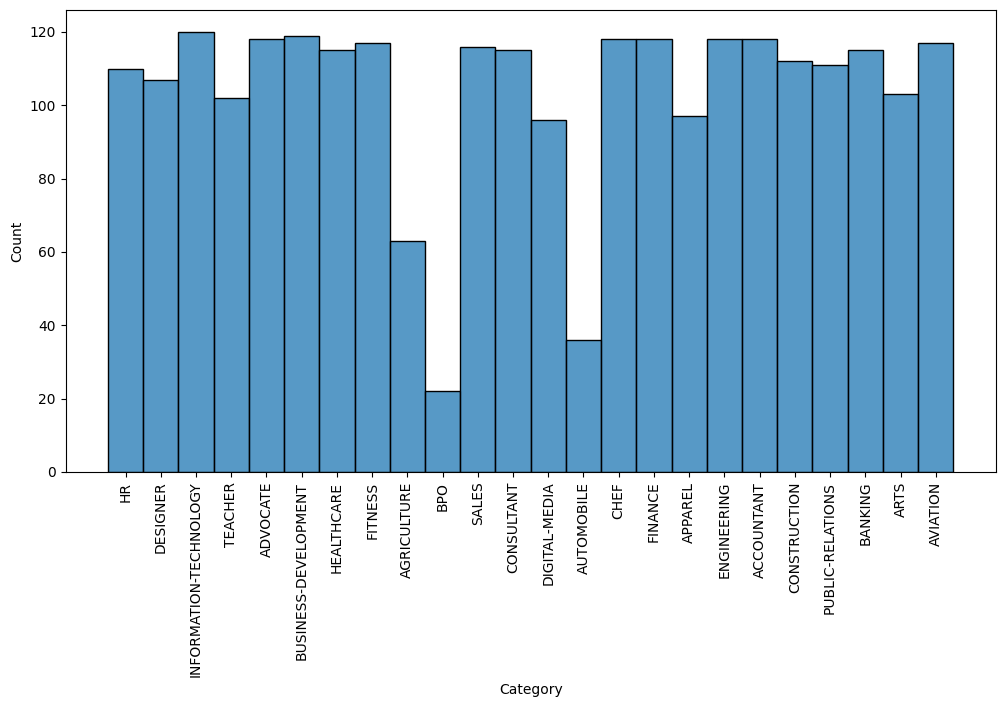

In [10]:
mp.figure(figsize=(12,6))
sn.histplot(df['Category'])
mp.xticks(rotation=90)
mp.show()

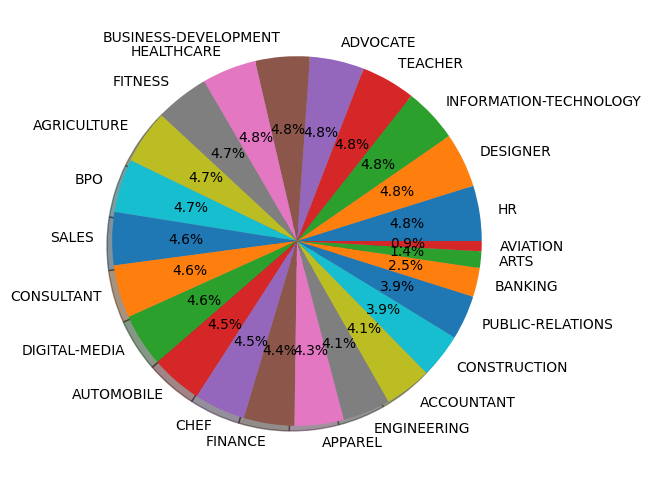

In [11]:
mp.figure(figsize=(15,6))
count=df['Category'].value_counts()
labels=df['Category'].unique()
mp.pie(count,labels=labels,shadow=True,autopct='%1.1f%%')
mp.show()

In [12]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [13]:
max_count=df['Category'].value_counts().max()

balancing_data=[]
for i in df['Category'].unique():
    cate_data=df[df['Category']==i]
    if len(cate_data)<max_count:
        bcd=resample(cate_data,replace=True,n_samples=max_count,random_state=42)
    else:
        bcd=resample(cate_data,replace=False,n_samples=max_count,random_state=42)
    balancing_data.append(bcd)

df=pd.concat(balancing_data)    


In [14]:
df.head(3)

,ID,Category,Feature
102,10399912,HR,hr personnel assistant summary u citizen autho...
51,39650734,HR,hr assistant summary hard worker dedicated det...
92,23510685,HR,global hr manager summary global hr profession...


In [15]:
df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

# 🚀 Model Training and Evaluation 🎓🤖

### 1. **Feature and Target Extraction** 🧩🔍

- We extract the features (`Feature` column) and target labels (`Category` column) from our dataset. This prepares our data for training and testing our models. 🏷️📋

### 2. **Splitting the Data** ✂️🔀

- Using **train_test_split** from **scikit-learn** 📚, we split our data into training and testing sets.
  - `x_train` and `y_train` are used to train our models.
  - `x_test` and `y_test` are used to evaluate the performance of our models.
  - We set `test_size=0.2` to allocate 20% of the data for testing and use `random_state=42` for reproducibility. 🔢🎲

### 3. **Text Vectorization** ✒️🔠

- We convert the textual data into numerical features using **TfidfVectorizer** from **scikit-learn** 📚.
  - We fit the vectorizer on the training data (`x_train`) and transform both the training and testing data into TF-IDF features. 📊

### 4. **Random Forest Classifier** 🌳🔠

- We initialize a **RandomForestClassifier** from **scikit-learn** 📚.
  - The classifier is trained on the TF-IDF transformed training data (`x_train_tidf` and `y_train`).
  - We then make predictions on the TF-IDF transformed testing data (`x_test_tidf`). 🧩

### 5. **Model Evaluation** 🧮📊

- Using **classification_report** from **scikit-learn** 📚, we evaluate the performance of our Random Forest model.
  - The report provides metrics such as precision, recall, f1-score, and support for each category. 📈
  - Our model achieves an accuracy of approximately 87%. 🎯

### 6. **Extra Trees Classifier** 🌳🔡

- We initialize and train an **ExtraTreesClassifier** from **scikit-learn** 📚.
  - Similar to the Random Forest, we train it on the TF-IDF transformed training data and make predictions on the testing data. 🧩
  - The accuracy of the Extra Trees model is approximately 84%. 📏

### 7. **Model Persistence** 🛠️💾

- We save our trained models and the vectorizer using **joblib** 🗜️.
  - The Random Forest model is saved as `model.jbl`.
  - The TF-IDF vectorizer is saved as `vectorizer.pkl`. 💾

By following these steps, we successfully train, evaluate, and save our resume classification models, ensuring that we can deploy them for real-world use in job recommendation systems. 🚀📈🛠️


In [16]:
x=df['Feature']
y=df['Category']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [17]:
vectorizer=TfidfVectorizer()
x_train_tidf=vectorizer.fit_transform(x_train)
x_test_tidf=vectorizer.transform(x_test)

In [18]:
rf=RandomForestClassifier()
rf.fit(x_train_tidf,y_train)

RandomForestClassifier()

In [19]:
y_pred=rf.predict(x_test_tidf)
acc=classification_report(y_test,y_pred)
print(acc)

                        precision    recall  f1-score   support



            ACCOUNTANT       0.74      1.00      0.85        20

              ADVOCATE       0.88      0.79      0.84        29

           AGRICULTURE       0.95      0.91      0.93        23

               APPAREL       0.64      0.73      0.68        22

                  ARTS       1.00      0.75      0.86        24

            AUTOMOBILE       1.00      0.68      0.81        19

              AVIATION       0.96      0.96      0.96        28

               BANKING       0.82      0.64      0.72        22

                   BPO       1.00      1.00      1.00        15

  BUSINESS-DEVELOPMENT       0.83      0.83      0.83        18

                  CHEF       0.87      0.96      0.92        28

          CONSTRUCTION       0.93      1.00      0.96        25

            CONSULTANT       0.96      0.84      0.90        31

              DESIGNER       0.86      0.86      0.86        28

         DIGITAL-MEDIA 

In [20]:
accuracy_score(y_test,y_pred)

0.8680555555555556

In [21]:
model2=ExtraTreesClassifier()
model2.fit(x_train_tidf,y_train)


ExtraTreesClassifier()

In [22]:
ypred=model2.predict(x_test_tidf)
print(accuracy_score(y_test,ypred))

0.84375


In [23]:
j.dump(rf,'model.jbl')

['model.jbl']

In [24]:
modl=j.load('model.jbl')

In [25]:
j.dump(vectorizer,'vectorizer.pkl')


['vectorizer.pkl']

# 📝 Resume Category Prediction Code 🌟

This notebook demonstrates how to load pre-trained models, clean and vectorize resumes, and predict the job category of a given resume text. 🚀

## 📥 Loading Pre-trained Models

In this step, we load the pre-trained machine learning model and vectorizer. The model is stored in a file named `model.jbl` and the vectorizer in `vectorizer.pkl`. 📂

## 📝 Sample Resume Text and Prediction

Next, we provide a sample resume text for testing. This text is then transformed using the vectorizer, and the pre-trained model is used to predict the job category of the resume. 🔍

## 🔄 Cleaning the Resume Text

To ensure accurate predictions, we clean the resume text. This involves:
- Removing URLs 🌐
- Removing mentions and hashtags 🏷️
- Removing special characters and emojis ✨
- Replacing multiple spaces with a single space 🔄

## 🤖 Vectorizing the Cleaned Text

After cleaning the resume text, we transform it into a format suitable for the model using the vectorizer. This step converts the text into numerical features that the model can process. 📊

## 🔍 Predicting the Job Category

Finally, we use the pre-trained model to predict the job category of the cleaned and vectorized resume text. The prediction is compared against a predefined list of categories to determine the job type. 🏆

## 📊 Example Predictions

Example resume texts are provided, cleaned, vectorized, and predicted to showcase the model's capabilities in identifying job categories accurately. 📜

### 🎯 Summary

- **Loading Models**: Load the pre-trained model and vectorizer. 📥
- **Cleaning Text**: Clean the resume text to remove unnecessary elements. 🧹
- **Vectorizing Text**: Transform the cleaned text using the vectorizer. 🔄
- **Predicting Category**: Use the model to predict the job category. 🎯

This process ensures that resumes are accurately categorized based on their content, providing valuable insights into job roles. 🌟


In [26]:
vectorizer=j.load('vectorizer.pkl')

In [27]:
text=['hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state helps develop policies directs coordinates activities employment compensation labor relations benefits training employee services prepares employee separation notices related documentation keeps records benefits plans participation insurance pension plan personnel transactions hires promotions transfers performance reviews terminations employee statistics government reporting advises management appropriate resolution employee relations issues administers benefits programs life health dental insurance pension plans vacation sick leave leave absence employee assistance marketing associate designed created marketing collateral sales meetings trade shows company executives managed house advertising program consisting print media collateral pieces assisted complete design launch company website months created official company page facebook facilitate interaction customers analyzed ratings programming features competitors evaluate effectiveness marketing strategies advanced medical claims analyst mar dec company name city state reviewed medical bills accuracy treatments tests hospital stays prior sanctioning claims trained interpret codes icd cpt terminology commonly used medical billing fully understand paperwork submitted healthcare providers required organizational analytical skills well computer skills knowledge medical terminology procedures statistics billing standards data analysis laws regarding medical billing assistant general manager jun dec company name city state performed duties including limited budgeting financial management accounting human resources payroll purchasing established maintained close working relationships departments hotel ensure maximum operation productivity morale guest service handled daily operations reported directly corporate office hired trained staff overall objectives goals emphasis high customer service marketing advertising working public relations media government local businesses chamber commerce executive support marketing assistant jul jun company name city state provided assistance various department heads executive marketing customer service human resources managed front end operations ensure friendly efficient transactions ensured swift resolution customer issues preserve customer loyalty complying company policies exemplified second none customer service delivery interactions customers potential clients reservation front office manager jun jul company name city state owner partner dec may company name city state price integrity coordinator aug dec company name city state education n business administration jefferson college city state business administration marketing advertising high school diploma college prep studies sainte genevieve senior high city state awarded american shrubel leadership scholarship jefferson college skills accounting ads advertising analytical skills benefits billing budgeting clients customer service data analysis delivery documentation employee relations financial management government relations human resources insurance labor relations marketing marketing collateral medical billing medical terminology office organizational payroll performance reviews personnel policies posters presentations public relations purchasing reporting statistics website']

In [28]:
vect=vectorizer.transform(text)
prediction=modl.predict(vect)

In [29]:
if prediction == 'HR':
    print("The Given Job description is for HR")
elif prediction == 'DESIGNER':
    print("The Given Job description is for DESIGNER")
elif prediction == 'ARTS':
    print("The Given Job description is for ARTS")
elif prediction == 'BANKING':
    print("The Given Job description is for BANKING")
elif prediction == 'PUBLIC-RELATIONS':
    print("The Given Job description is for PUBLIC-RELATIONS")
elif prediction == 'CONSTRUCTION':
    print("The Given Job description is for CONSTRUCTION")
elif prediction == 'ACCOUNTANT':
    print("The Given Job description is for ACCOUNTANT")
elif prediction == 'ENGINEERING':
    print("The Given Job description is for ENGINEERING")
elif prediction == 'APPAREL':
    print("The Given Job description is for APPAREL")
elif prediction == 'FINANCE':
    print("The Given Job description is for FINANCE")
elif prediction == 'CHEF':
    print("The Given Job description is for CHEF")
elif prediction == 'AUTOMOBILE':
    print("The Given Job description is for AUTOMOBILE")
elif prediction == 'DIGITAL-MEDIA':
    print("The Given Job description is for DIGITAL-MEDIA")
elif prediction == 'CONSULTANT':
    print("The Given Job description is for CONSULTANT")
elif prediction == 'SALES':
    print("The Given Job description is for SALES")
elif prediction == 'BPO':
    print("The Given Job description is for BPO")
elif prediction == 'AGRICULTURE':
    print("The Given Job description is for AGRICULTURE")
elif prediction == 'FITNESS':
    print("The Given Job description is for FITNESS")
elif prediction == 'HEALTHCARE':
    print("The Given Job description is for HEALTHCARE")
elif prediction == 'BUSINESS-DEVELOPMENT':
    print("The Given Job description is for BUSINESS-DEVELOPMENT")
elif prediction == 'ADVOCATE':
    print("The Given Job description is for ADVOCATE")
elif prediction == 'TEACHER':
    print("The Given Job description is for TEACHER")
elif prediction == 'INFORMATION-TECHNOLOGY':
    print("The Given Job description is for INFORMATION-TECHNOLOGY")
elif prediction == 'AVIATION':
    print("The Given Job description is for AVIATION")
else:
    print("Unknown Job Description")


The Given Job description is for HR


In [30]:
text=['independent consultant career overview energetic customer service pr representative motivated maintain customer satisfaction contribute company success enthusiastic connect people offer best customer service experienced date capitalizing strengths listed asset company assist helping grow expand business successes successfully orchestrated annual conference people improved organization workflow business office congregations coordinated emceed annual women retreats years exceptional multi tasker accuracy speed saved company tens thousands dollars work several people years lumber company core strengths strong organizational skills courteous demeanor energetic work attitude leadership experience great people skills reliable responsible team player strong initiative problem solving skills work experience independent consultant jul current company name city state generate sales existing clients focused new client acquisition provide excellent customer service clients including prompt responsiveness delivery product troubleshoot coach consultants team create invitations flyers advertising purposes creative worship arts director dec may company name city state responsible organization weekly church services including leading worship team band song selection creating designing keynote slides songs announcements overall presentation church facility successfully led volunteer worship team band variety personalities schedules coordinated monthly schedule including practices performances planned organized led many church women events e retreats dinners bbq family movie nights etc designed creative visual displays assist sermon themes office manager may current company name city state responsible running district office assists oversees churches la orange county single handedly coordinate annual convention pastors delegates prepared annual town retreats including facility selection arrangement hotel reservations meal coordination speaker bookings schedule management creation printed materials collection required information attendees excursion planning process document monies received churches accounts receivable accounts payable assist district superintendent emergency projects arise often requiring flexibility creativity quick thinking executive assistant jan nov company name city state years company receptionist expert customer service provider promoted executive assistant vice president responsible billing invoices customers accounts receivable accounts payable k contact person filing legal construction preliminary notices lien releases handled dmv transactions fleet trucks assisted vice president various projects skills microsoft word excel powerpoint leadership keynote telephone skills key multi taskingnotary years proofreading proficient spanish strengths finders results includer achiever responsible disciplined consistent']

In [31]:
vect=vectorizer.transform(text)
prediction=modl.predict(vect)

In [32]:
if prediction == 'HR':
    print("The Given Job description is for HR")
elif prediction == 'DESIGNER':
    print("The Given Job description is for DESIGNER")
elif prediction == 'ARTS':
    print("The Given Job description is for ARTS")
elif prediction == 'BANKING':
    print("The Given Job description is for BANKING")
elif prediction == 'PUBLIC-RELATIONS':
    print("The Given Job description is for PUBLIC-RELATIONS")
elif prediction == 'CONSTRUCTION':
    print("The Given Job description is for CONSTRUCTION")
elif prediction == 'ACCOUNTANT':
    print("The Given Job description is for ACCOUNTANT")
elif prediction == 'ENGINEERING':
    print("The Given Job description is for ENGINEERING")
elif prediction == 'APPAREL':
    print("The Given Job description is for APPAREL")
elif prediction == 'FINANCE':
    print("The Given Job description is for FINANCE")
elif prediction == 'CHEF':
    print("The Given Job description is for CHEF")
elif prediction == 'AUTOMOBILE':
    print("The Given Job description is for AUTOMOBILE")
elif prediction == 'DIGITAL-MEDIA':
    print("The Given Job description is for DIGITAL-MEDIA")
elif prediction == 'CONSULTANT':
    print("The Given Job description is for CONSULTANT")
elif prediction == 'SALES':
    print("The Given Job description is for SALES")
elif prediction == 'BPO':
    print("The Given Job description is for BPO")
elif prediction == 'AGRICULTURE':
    print("The Given Job description is for AGRICULTURE")
elif prediction == 'FITNESS':
    print("The Given Job description is for FITNESS")
elif prediction == 'HEALTHCARE':
    print("The Given Job description is for HEALTHCARE")
elif prediction == 'BUSINESS-DEVELOPMENT':
    print("The Given Job description is for BUSINESS-DEVELOPMENT")
elif prediction == 'ADVOCATE':
    print("The Given Job description is for ADVOCATE")
elif prediction == 'TEACHER':
    print("The Given Job description is for TEACHER")
elif prediction == 'INFORMATION-TECHNOLOGY':
    print("The Given Job description is for INFORMATION-TECHNOLOGY")
elif prediction == 'AVIATION':
    print("The Given Job description is for AVIATION")
else:
    print("Unknown Job Description")


The Given Job description is for ARTS


In [33]:
def cleanResume(txt):
    cleanText=r.sub('http\S+\s',' ',txt)
    cleanText=r.sub('RT|cc',' ',cleanText)
    cleanText=r.sub('#\S+\s',' ',cleanText)
    cleanText=r.sub('@\S+',' ',cleanText)
    cleanText=r.sub('[%s]'% r.escape("""!"#$%&"()*+,-./;:<=>?@[\]^_'{|}~""")," ",cleanText)
    cleanText=r.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText=r.sub('\s+',' ',cleanText)
    return cleanText




    

In [34]:
def predict_Category(resume_text):
    resume_text=cleanResume(resume_text)
    resume_tidf=vectorizer.transform([resume_text])
    predicted_Category=modl.predict(resume_tidf)[0]
    return predicted_Category


    

In [35]:
resume="""Current Job Title (e.g., HR Manager)
Company/Organization Name, City, State
Month 20XX–Present

Include a bulleted list of your achievements as an HR professional
Start each bullet point with an action verb (like “develop” or “manage”) to grab attention
Use the present tense for your current HR role, unless describing a completed project or initiative
Use hard numbers when possible to quantify your accomplishments as an HR professional
Mention how you’ve used some of the HR skills listed in your skills section to demonstrate your mastery of these abilities
Previous Job Title (e.g., HR Coordinator)
Company/Organization Name, City, State
Month 20XX–Month 20XX

List relevant accomplishments from your previous role as an HR professional
Assuming you’re no longer working in this HR role, use past tense verbs to describe your work
Include 3–6 bullet points for each HR role, both your current one and previous ones
Skip the pronoun “I” and begin directly with a verb
Although you’ll usually list work experience, feel free to include HR-relevant internships as well as any volunteer work and extracurricular activities if you lack formal work experience

EDUCATION

Degree Name / Major
University, City, State | Graduation Month, Year
GPA: 3.X/4.0 (optional)
Latin honors (if applicable)


SKILLS & CERTIFICATIONS

List skills and certifications relevant to the HR job you’re applying for
Look at the job description for ideas of the skills the employer wants and that are common in HR
Emphasize HR-specific hard skills and technical skills in this section
Be as specific as possible by including names of tools, equipment, and software you’ve mastered that are used in HR

OPTIONAL RESUME SECTIONS

Add any other relevant information about your background here
For example, a separate section could be used to highlight any of the following information: HR-relevant awards, publications, or coursework, as well as languages and volunteer experience
"""
predicted_cate=predict_Category(resume)
print("predicted category: ",predicted_cate)

predicted category:  HR


# 📚 Conclusion

In this notebook, we demonstrated the steps to predict the job category of a resume using a pre-trained machine learning model. The process included loading models, cleaning text, vectorizing text, and predicting job categories. This approach helps in automating the categorization of resumes, making the hiring process more efficient and accurate. 🚀

### 🔍 What You Can Do More

- **Expand the Dataset**: Increase the size and diversity of the training dataset to improve model accuracy. 📈
- **Fine-Tune the Model**: Experiment with different machine learning algorithms and hyperparameters for better performance. 🔧
- **Feature Engineering**: Incorporate additional features like job titles, skills, and education to enhance prediction accuracy. 🛠️
- **UI/UX Enhancements**: Create a user-friendly web application to upload and categorize resumes in real-time. 🌐

## 🙏 Thank You!

Thank you for visiting this notebook! We hope you found it informative and useful. If you enjoyed this notebook, please check out my other projects for more exciting content. 🌟

- **[Project 1: Anime Character Recommendation Based on Facial Similarity](https://www.kaggle.com/code/anuragraj03/anime-character-face-matching) 🎨**
- **[Project 2: Population Growth Dashboard using Power BI](https://www.kaggle.com/code/anuragraj03/exploring-global-population-trends) 🌍**
- **[Project 3: Sentiment Analysis of Twitter Users](https://www.kaggle.com/code/anuragraj03/how-to-perform-sentiment-analysis-prediction) 📊**

Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/anurag-raj-770b6524a/) for more updates and collaborations. 🌐

---

Happy coding and see you in the next project! 👋✨
